In [912]:
from utils import u_time as ut
from utils import u_arrays as ua
from eod import read_eod as re
import salem
import numpy as np
from scipy.ndimage.measurements import label 
import pyproj
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
from wavelet import util
import cleo
import pickle as pkl
import os
from scipy import ndimage
from skimage.feature import match_template
from skimage.measure import compare_ssim
import xarray as xr

pylab.rcParams['figure.figsize'] = 20., 12.
%matplotlib inline

In [689]:
files = ua.locate(".nc", '/users/global/cornkle/MCSfiles')

In [891]:
dic = xr.open_dataset(files[25])
dic.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:  (x: 152, y: 107)
Coordinates:
    time     datetime64[ns] 2006-07-28T22:32:00
    lon      (x, y) float64 -10.46 -10.41 -10.37 -10.32 -10.28 -10.23 -10.19 ...
    lat      (x, y) float64 10.38 10.38 10.38 10.38 10.38 10.38 10.38 10.38 ...
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Data variables:
    pmask    (x, y) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    tc_lag0  (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    p        (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    tmask    (x, y) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    t_lag1   (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    t_lag0   (x, y) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    tc_lag1  (x, y) float64 nan nan nan nan n

In [892]:
sum(dic['tmask'].values[np.where(dic['pmask'].values)])

2183

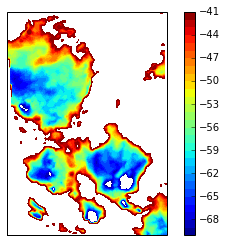

In [893]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(dic['lon'], dic['lat'], dic['t_lag1'], levels=np.arange(-70,-40,1), transform=ccrs.PlateCarree(), cmap='jet')
#plt.contour(dic['lon'], dic['lat'], dic['p'], levels=np.arange(2,8,0.2), transform=ccrs.PlateCarree())

ax.coastlines()
cbar=plt.colorbar()

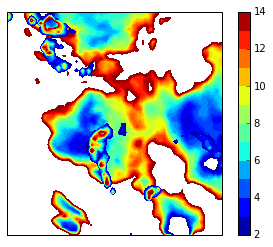

In [894]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(dic['lon'], dic['lat'], dic['t_lag1'], levels=np.arange(-70,-40,1), transform=ccrs.PlateCarree(), cmap='jet')
plt.contourf(dic['lon'], dic['lat'], dic['p'], levels=np.arange(2,15,1), transform=ccrs.PlateCarree())

ax.coastlines()
cbar=plt.colorbar()

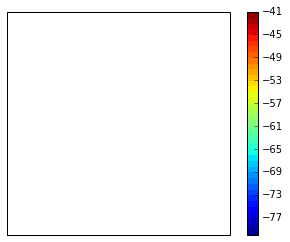

In [895]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(dic['lon'], dic['lat'], dic['tc_lag0'], levels=np.arange(-80,-40,1), transform=ccrs.PlateCarree(), cmap='jet')
#plt.contourf(dic['lon'], dic['lat'], dic['p'], levels=np.arange(1,15,0.5), transform=ccrs.PlateCarree())
#plt.contour(td['lon'], td['lat'], td['p'], levels=np.arange(0,10,1), transform=ccrs.PlateCarree())
ax.coastlines()
cbar=plt.colorbar()

In [896]:
outt=dic['tc_lag0'].values.copy()
mmeans=np.percentile(outt[np.isfinite(outt)], 30)
print(mmeans)
maxi=np.nanmin(outt)
thresh=maxi+15
print(thresh)

-58.6087978847
-63.7759786259


In [897]:
outp=dic['p'].values.copy()
outp[np.isnan(outp)]=-10**-5
outt[np.isnan(outt)]=-150  
outt[outt>thresh]=-150
mmeans=dic.meanT_cut

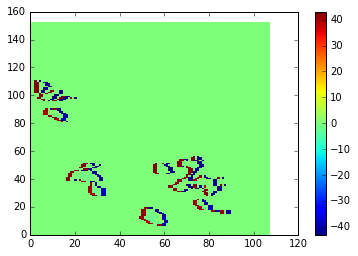

In [898]:
grad=np.gradient(outt)
plt.pcolormesh(grad[1])
plt.colorbar()

nok = np.where(abs(grad[1]) > 30)

In [899]:
o2=outt.copy()
#o1=outt.copy()
o2[o2<-100]=mmeans
print(mmeans)
d=1
i=nok[0]
j=nok[1]

-54.2380778173


In [900]:
#for ii,jj in zip(i,j):
    
#    kernel=o2[ii-d:ii+d+1, jj-d:jj+d+1]
#    if not kernel.any():
#        continue
#    else:    
#        o2[ii-d:ii+d+1, jj-d:jj+d+1]=ndimage.gaussian_filter(kernel, 3, mode='nearest')

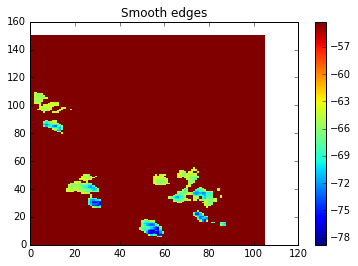

In [901]:
plt.pcolormesh(o2[1:-1, 1:-1])
plt.colorbar()
plt.title('Smooth edges')

In [909]:
wav['scales']

array([  15.,   16.,   17.,   18.,   19.,   20.,   21.,   22.,   24.,
         25.,   27.,   28.,   30.,   32.,   34.,   36.,   38.,   40.,
         42.,   45.,   48.,   50.,   53.,   57.,   60.,   64.,   67.,
         71.,   76.,   80.,   85.,   90.,   95.,  101.,  107.,  113.,
        120.,  127.,  135.,  143.,  151.,  160.,  170.,  180.,  190.,  202.])

In [903]:
pos=10
wav = util.waveletTP(o2, outp, 5)
print(wav['scales'][pos])
tt=wav['t'][pos,:,:]
pp=wav['p'][pos,:, :]
tt[np.where(dic['pmask'].values==0)]=0
#pm=pp.max()
#tm=tt.max()
#tt=tt/tm
#pp=pp/pm
#tt[tt>0.1]=1
#pp[pp>0.1]=1
#tt[tt<=0.1]=0
#pp[pp<=0.1]=0

27.0


(152, 107)
(152, 107)


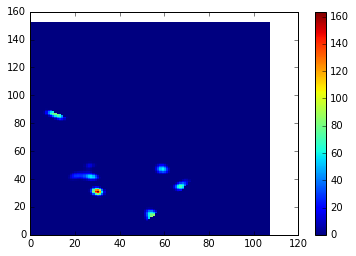

In [904]:
plt.pcolormesh(tt)
plt.colorbar()
print(tt.shape)
print(dic['tc_lag0'].shape)

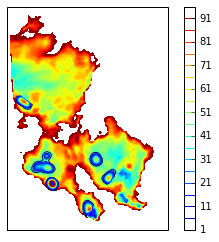

In [905]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(dic['lon'], dic['lat'], dic['tc_lag0'], levels=np.arange(-80,-40,1), transform=ccrs.PlateCarree(), cmap='jet')
plt.contour(dic['lon'], dic['lat'], tt, levels=np.arange(1,100,5), transform=ccrs.PlateCarree())
#plt.contour(td['lon'], td['lat'], td['p'], levels=np.arange(0,10,1), transform=ccrs.PlateCarree())
ax.coastlines()
cbar=plt.colorbar()

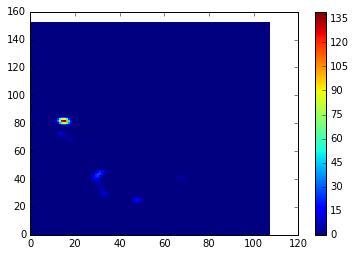

In [906]:
plt.pcolormesh(pp)
plt.colorbar()
pm=pp.max()

In [910]:
thing=match_template(tt, pp[5:-5, 5:-5])
print(max(thing.flatten()))
y,x = np.unravel_index(np.argmax(thing), thing.shape)
print(y, x)

0.365014
9 1


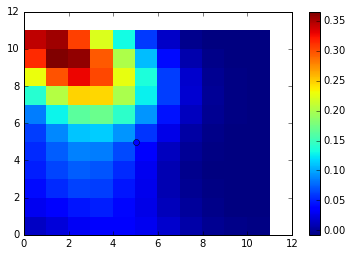

In [908]:
plt.pcolormesh(thing)
plt.colorbar()
plt.plot(5,5, 'bo')

In [913]:
myDicts = pkl.load( open ('/users/global/cornkle/MCSfiles/save/MCScorr.p', 'rb'))

In [917]:
myDicts.keys()
arr=np.array([15,   16,   17,   18,   19,   20,   21,   22,   24,
         25,   27,   28,   30,   32,   34,   36,   38,   40,
         42,   45,   48,   50,   53,   57,   60], dtype=str)


In [918]:
l=[]
for k in arr:
    for kk in arr:
        l.append(np.mean(myDicts[k][kk]))    

In [919]:
nl=np.array(l)

In [965]:
np.mean(myDicts['60']['15'])

0.31184301

In [923]:
nl_resh=nl.reshape(25,25)

In [942]:
ybah,x = np.unravel_index(np.argmax(nl_resh, axis=0), nl_resh.shape)
y,xbah = np.unravel_index(np.argmax(nl_resh, axis=1), nl_resh.shape)
print(x.shape)
ybah

ValueError: not enough values to unpack (expected 2, got 1)

In [994]:
y = np.argmax(nl_resh, axis=0)
x = np.argmax(nl_resh, axis=1)
rise=range(25)
nl_resh[0, :]
tes=np.array(arr, dtype=int)

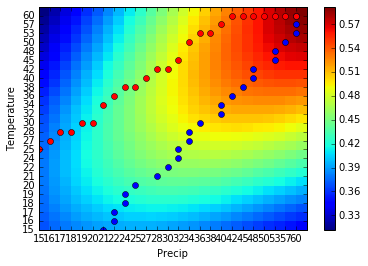

In [1015]:
plt.pcolormesh(nl_resh)#, levels=np.arange(0.25,0.7,0.01))
plt.xticks(rise, arr)
plt.yticks(rise, arr)
plt.colorbar()
plt.plot(y,rise, 'bo')
plt.plot(rise,x, 'ro')
plt.ylabel('Temperature')
plt.xlabel('Precip')
plt.savefig('/users/global/cornkle/MCSfiles/save/TP_scales.pdf')

In [980]:
l=range(25)
npl=np.array(l)
pp=npl.reshape(5,5)
pp

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

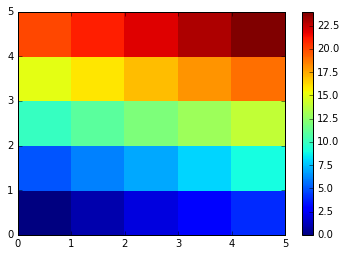

In [979]:
plt.pcolormesh(pp)
plt.colorbar()